<h1 style='text-align: center'><strong>Logistic regression</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Breast cancer classification</strong></h2>

<h4 style='text-align: center'>Breast cancer dataset</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Features">Features</a></li>
        <li><a href="#Splitting-the-dataset">Splitting the dataset</a></li>
        <li><a href="#Logistic-regression-model">Logistic regression model</a></li>
        <li><a href="#Predictions">Predictions</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
        <li><a href="#EasyExampleWithVideo">Easy Example With Video</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick; these are represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names.

The logistic regression model is given by:

\begin{equation}
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n)}}
\end{equation}

Where:
- $P(y=1|x)$ is the probability that the dependent variable is 1 given the independent variables $x$.
- $\beta_0$ is the intercept.
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients of the independent variables $x_1, x_2, ..., x_n$.
- $e$ is the Euler's number.

<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

### Import necessary libraries
- **pandas**: For data manipulation and analysis.
- **train_test_split from sklearn.model_selection**: To split the dataset into training and testing sets.
- **LogisticRegression from sklearn.linear_model**: To create and train the logistic regression model.
- **classification_report from sklearn.metrics**: To generate a detailed classification report.
- **load_breast_cancer from sklearn.datasets**: To load the Breast Cancer dataset.
- **matplotlib.pyplot**: For plotting the results.
- **ConfusionMatrixDisplay from sklearn.metrics**: To display the confusion matrix.


<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>

In [2]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Load the Breast Cancer dataset
- **data = load_breast_cancer()**: Loads the Breast Cancer dataset.
- **df = pd.DataFrame(data.data, columns=data.feature_names)**: Creates a DataFrame `df` containing the features of the dataset.
- **df['target'] = data.target**: Adds the target variable (`target`) to the DataFrame.


<h2 style='text-align: center' id='Features'><strong>4. Features</strong></h2>

In [3]:
# Select the features and target variable
X = df.drop('target', axis=1)
y = df['target']

### Select the features and target variable
- **X = df.drop('target', axis=1)**: Selects all columns except the `target` column as features for the model.
- **y = df['target']**: Selects the `target` column as the target variable.

<h2 style='text-align: center' id='Splitting-the-dataset'><strong>5. Splitting the dataset</strong></h2>

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Split the data into training and testing sets
- **train_test_split(X, y, test_size=0.2, random_state=42)**: Splits the data into training and testing sets. 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
- **test_size=0.2**: Specifies that 20% of the data should be used for testing.
- **random_state=42**: Ensures reproducibility by setting a random seed.


<h2 style='text-align: center' id='Logistic-regression-model'><strong>6. Logistic regression model</strong></h2>

In [5]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

### Create and train the Logistic Regression model
- **model = LogisticRegression(max_iter=10000)**: Initializes the logistic regression model with a maximum of 10,000 iterations.
- **model.fit(X_train, y_train)**: Trains the model using the training data (`X_train` and `y_train`).

<h2 style='text-align: center' id='Predictions'><strong>7. Predictions</strong></h2>

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



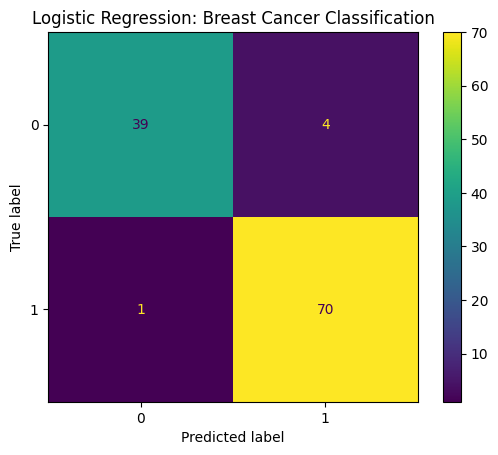

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Logistic Regression: Breast Cancer Classification')
plt.show()

### Make predictions
- **y_pred = model.predict(X_test)**: Uses the trained model to make predictions on the testing data (`X_test`).

### Print the classification report
- **print(classification_report(y_test, y_pred))**: Prints the classification report, which includes precision, recall, F1-score, and support for each class.

### Plot the confusion matrix
- **ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)**: Generates a confusion matrix using the model's predictions and the actual testing data (`X_test` and `y_test`).
- **plt.title('Logistic Regression: Breast Cancer Classification')**: Sets the title of the plot.
- **plt.show()**: Displays the plot.


<h2 style='text-align: center' id='Evaluation'><strong>8. Evaluation</strong></h2>

In [7]:
# Evaluate the model
score = model.score(X_test, y_test)
print(f'Accuracy: {score:.2f}')

Accuracy: 0.96


### Evaluate the model
- **score = model.score(X_test, y_test)**: Calculates the accuracy of the model on the testing data.
- **print(f'Accuracy: {score:.2f}')**: Prints the accuracy of the model.


<h2 style='text-align: center' id='EasyExampleWithVideo'><strong>9. Easy Example With Video</strong></h2>

<div style='text-align: center'>
    <a href='https://www.instagram.com/p/C8IIGbwxMdN/'><img src='Videos/LogisticRegression.png' width='250'/></a>
    <p>Click on the image to watch the video</p>
</div>